In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("smart_meter_data.csv")

In [4]:
df.head()

,datetime,msn,location,daily_consumption_load,energy_supplied,energy_billed
0,2021-01-01 00:00:00,ACE43B7D,Chennai,2.59,2.78,2.57
1,2021-01-01 00:15:00,ACE43B7D,Chennai,1.78,2.12,1.86
2,2021-01-01 00:30:00,ACE43B7D,Chennai,2.59,2.68,2.52
3,2021-01-01 00:45:00,ACE43B7D,Chennai,2.45,2.56,2.50
4,2021-01-01 01:00:00,ACE43B7D,Chennai,1.48,1.56,1.49


In [6]:
df.shape

(525600, 6)

In [ ]:
df['msn'].unique()
# so we have 5 unique smart meters in our dataset

array(['ACE43B7D', '7F6ACD62', '0653DAA9', '344684B5', '3F42A75F'],
      dtype=object)

In [ ]:
# calculate the daily consumption for each smart meter
df['date'] = pd.to_datetime(df['datetime']).dt.date
daily_consumption = df.groupby(['msn', 'date'])['daily_consumption_load'].sum().reset_index()

In [15]:
daily_consumption.head()

,msn,date,daily_consumption_load
0,0653DAA9,2021-01-01,239.66
1,0653DAA9,2021-01-02,251.17
2,0653DAA9,2021-01-03,245.77
3,0653DAA9,2021-01-04,262.30
4,0653DAA9,2021-01-05,265.65


In [16]:
# calculate total consumption for each smart meter for each year
daily_consumption['year'] = pd.to_datetime(daily_consumption['date']).dt.year
annual_consumption = daily_consumption.groupby(['msn', 'year'])['daily_consumption_load'].sum().reset_index()

In [17]:
annual_consumption

,msn,year,daily_consumption_load
0,0653DAA9,2021,88810.11
1,0653DAA9,2022,89043.75
2,0653DAA9,2023,89056.45
3,344684B5,2021,89178.19
4,344684B5,2022,88927.69
5,344684B5,2023,88850.63
6,3F42A75F,2021,89136.65
7,3F42A75F,2022,89171.52
8,3F42A75F,2023,89004.54
9,7F6ACD62,2021,89293.89


In [19]:
# total Consumption per smart meter for all years
total_consumption = annual_consumption.groupby('msn')['daily_consumption_load'].sum().reset_index()
total_consumption.rename(columns={'daily_consumption_load': 'total_consumption'}, inplace=True)
total_consumption

,msn,total_consumption
0,0653DAA9,266910.31
1,344684B5,266956.51
2,3F42A75F,267312.71
3,7F6ACD62,267841.47
4,ACE43B7D,267460.08


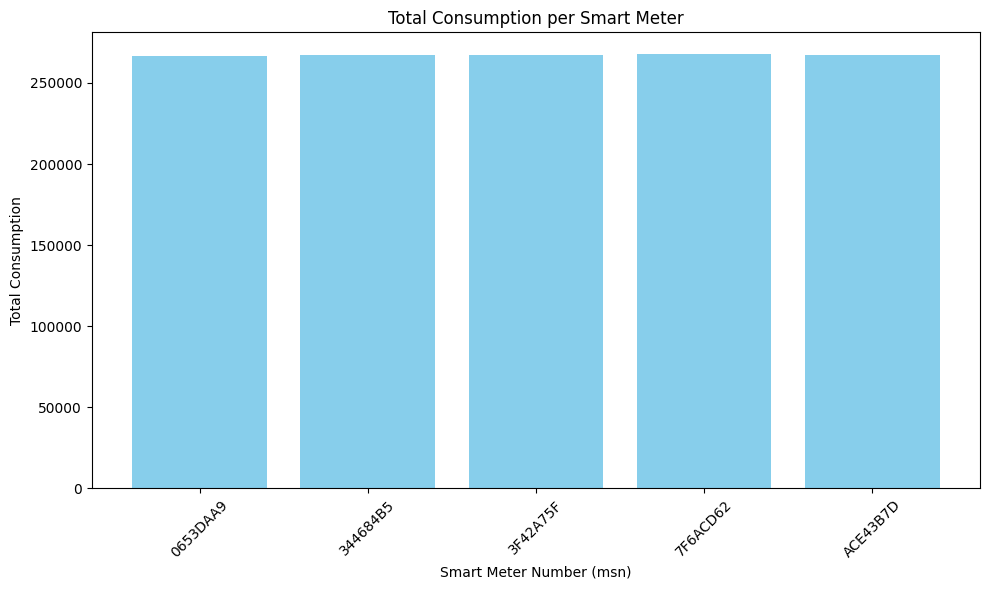

In [20]:
# plot the total consumption per smart meter
plt.figure(figsize=(10,6))
plt.bar(total_consumption['msn'], total_consumption['total_consumption'], color='skyblue')
plt.xlabel('Smart Meter Number (msn)')
plt.ylabel('Total Consumption')
plt.title('Total Consumption per Smart Meter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

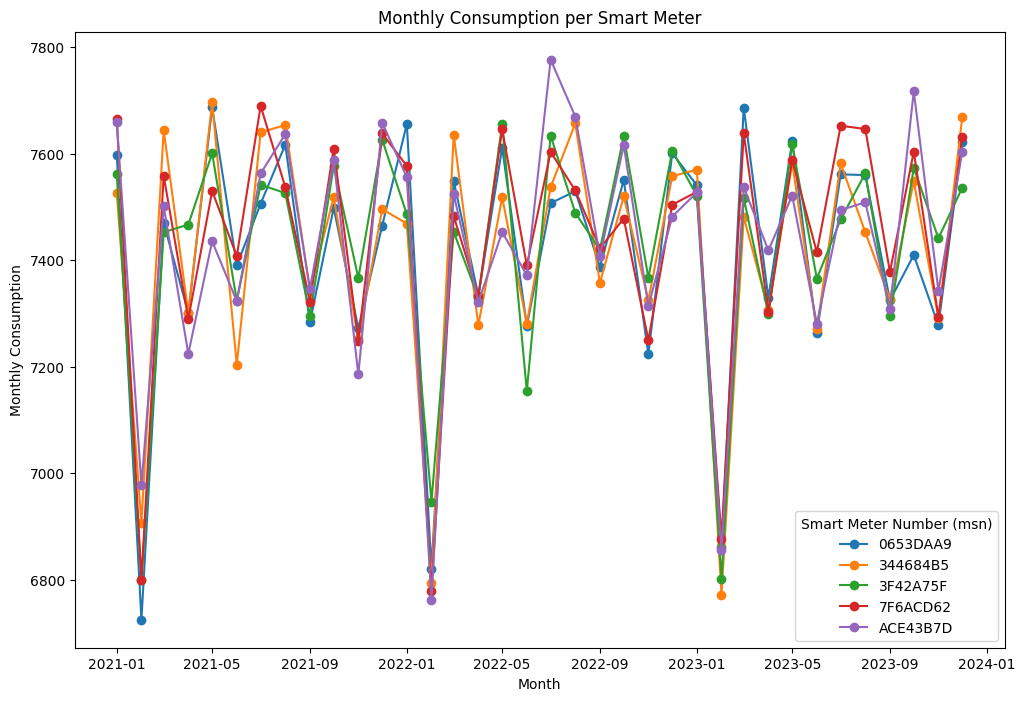

In [23]:
# x axis as months and y axis as consumption for each smart meter
monthly_consumption = daily_consumption.copy()
monthly_consumption['month'] = pd.to_datetime(monthly_consumption['date']).dt.to_period('M')
monthly_consumption = monthly_consumption.groupby(['msn', 'month'])['daily_consumption_load'].sum().reset_index()
monthly_consumption['month'] = monthly_consumption['month'].dt.to_timestamp()
plt.figure(figsize=(12,8))
for msn in monthly_consumption['msn'].unique():
    meter_data = monthly_consumption[monthly_consumption['msn'] == msn]
    plt.plot(meter_data['month'], meter_data['daily_consumption_load'], marker='o', label=msn)
plt.xlabel('Month')
plt.ylabel('Monthly Consumption')
plt.title('Monthly Consumption per Smart Meter')
plt.legend(title='Smart Meter Number (msn)')


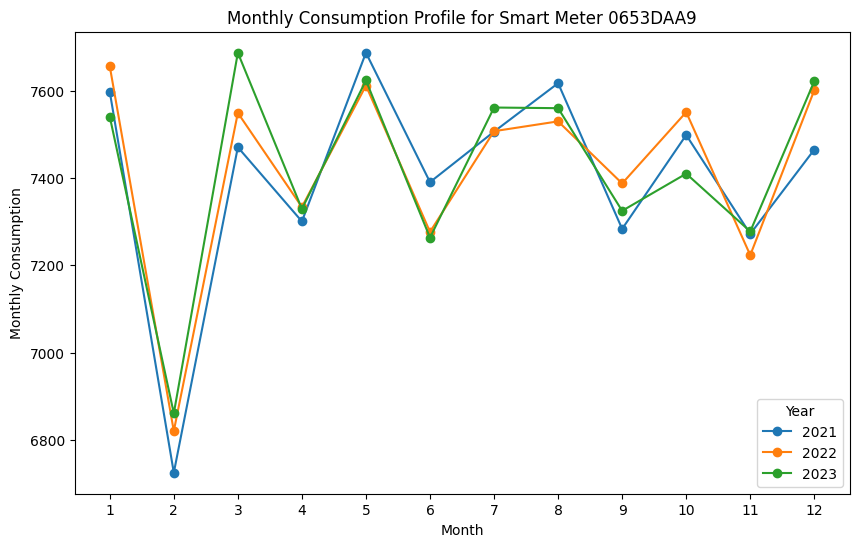

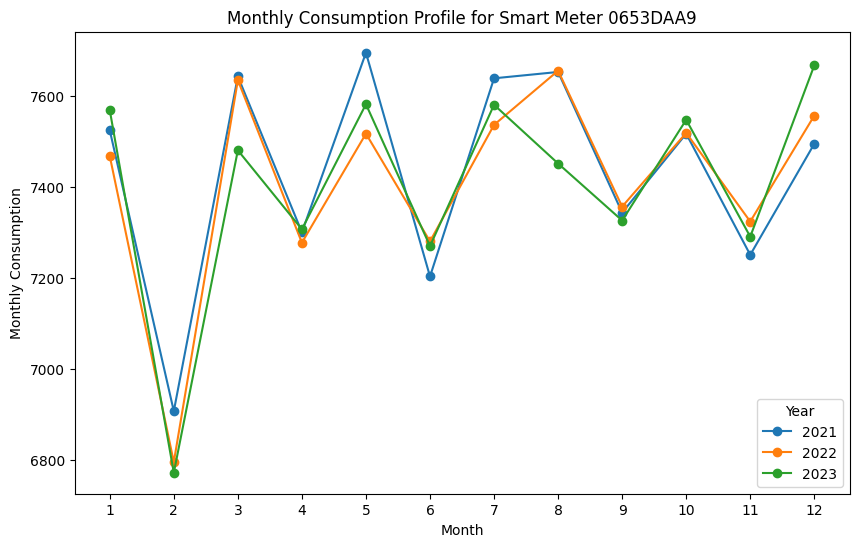

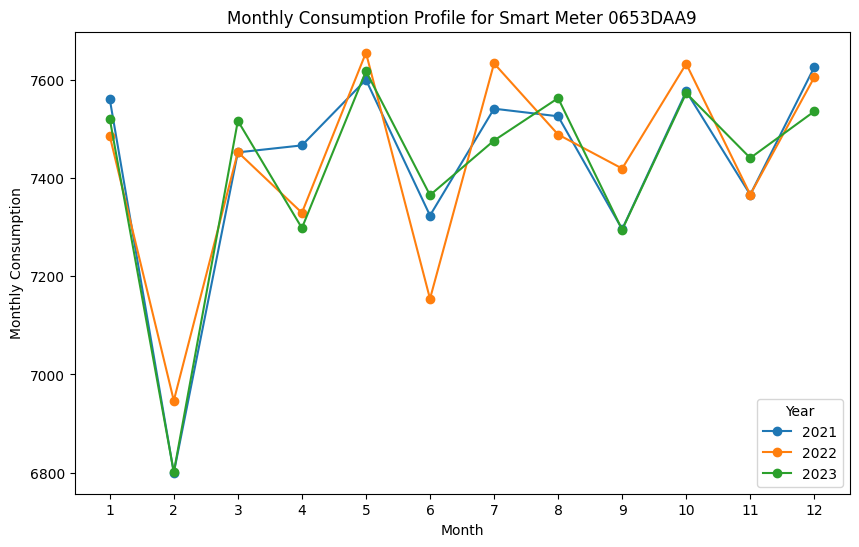

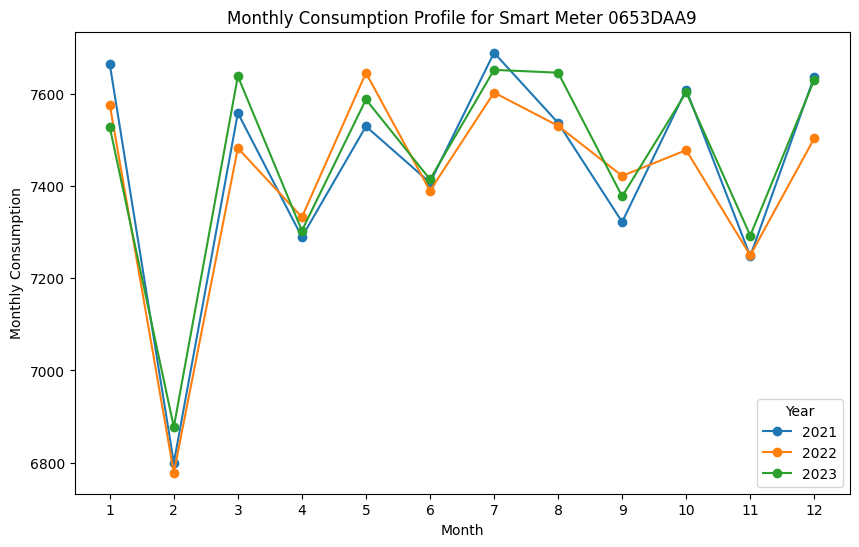

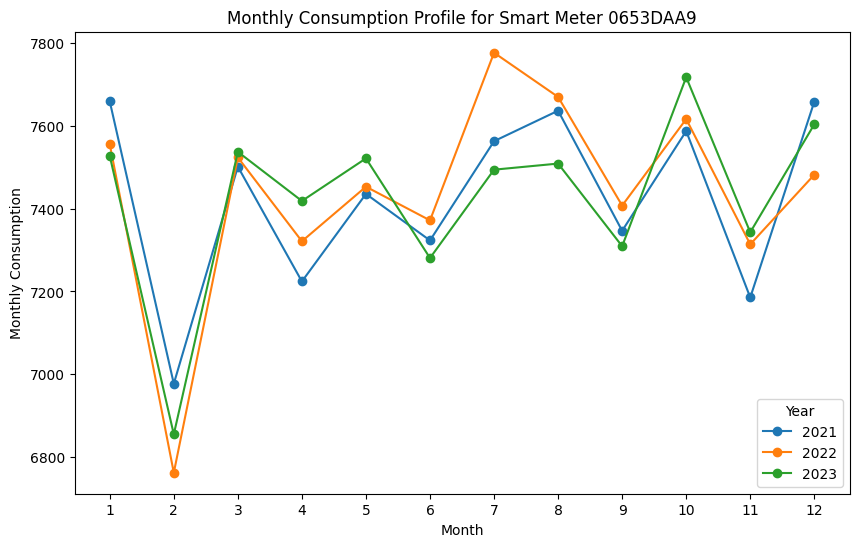

In [32]:
# plot graph for a specific smart meter '0653DAA9' in single graph I want to see its monthly consumption profile for all the years stack one on another
# for every meter we have data for multiple years so we can plot the monthly consumption profile for each year
#ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
meters=monthly_consumption['msn'].unique()
for i in meters:
    meter_data = df[df['msn'] == i]
    meter_data['month'] = pd.to_datetime(meter_data['datetime']).dt.month
    meter_data['year'] = pd.to_datetime(meter_data['datetime']).dt.year
    monthly_profile = meter_data.groupby(['year', 'month'])['daily_consumption_load'].sum().reset_index()
    plt.figure(figsize=(10,6))
    for year in monthly_profile['year'].unique():
        year_data = monthly_profile[monthly_profile['year'] == year]
        plt.plot(year_data['month'], year_data['daily_consumption_load'], marker='o', label=year)
    plt.xlabel('Month')
    plt.ylabel('Monthly Consumption')
    plt.title('Monthly Consumption Profile for Smart Meter 0653DAA9')
    plt.legend(title='Year')
    plt.xticks(range(1,13))
    plt.show()


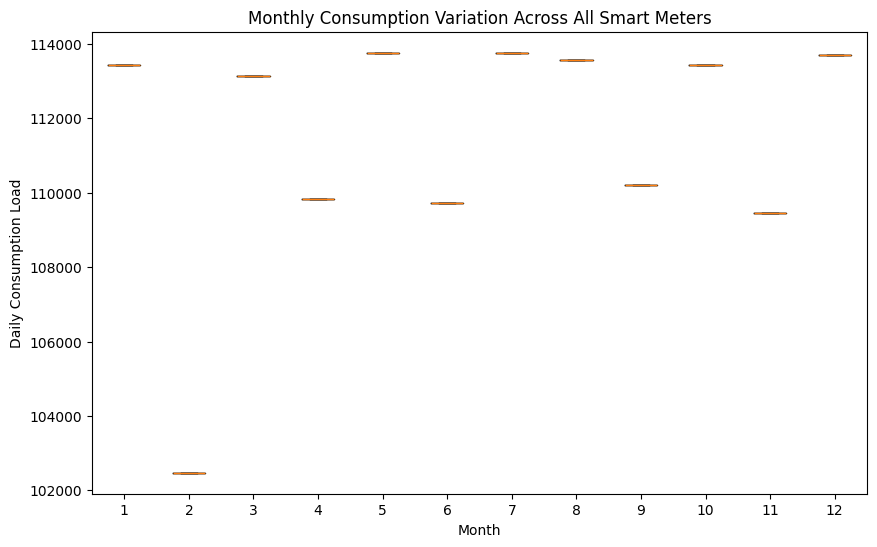

In [35]:
#  scakc all data month wise to see the variation in consumption across months for all smart meters together in the form of box plot
monthly_consumption_all = df.copy()
monthly_consumption_all['month'] = pd.to_datetime(monthly_consumption_all['datetime']).dt.month
monthly_consumption_all = monthly_consumption_all.groupby(['month'])['daily_consumption_load'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.boxplot([monthly_consumption_all[monthly_consumption_all['month'] == m]['daily_consumption_load'] for m in range(1,13)], labels=[str(m) for m in range(1,13)])
plt.xlabel('Month')
plt.ylabel('Daily Consumption Load')
plt.title('Monthly Consumption Variation Across All Smart Meters')
plt.show()

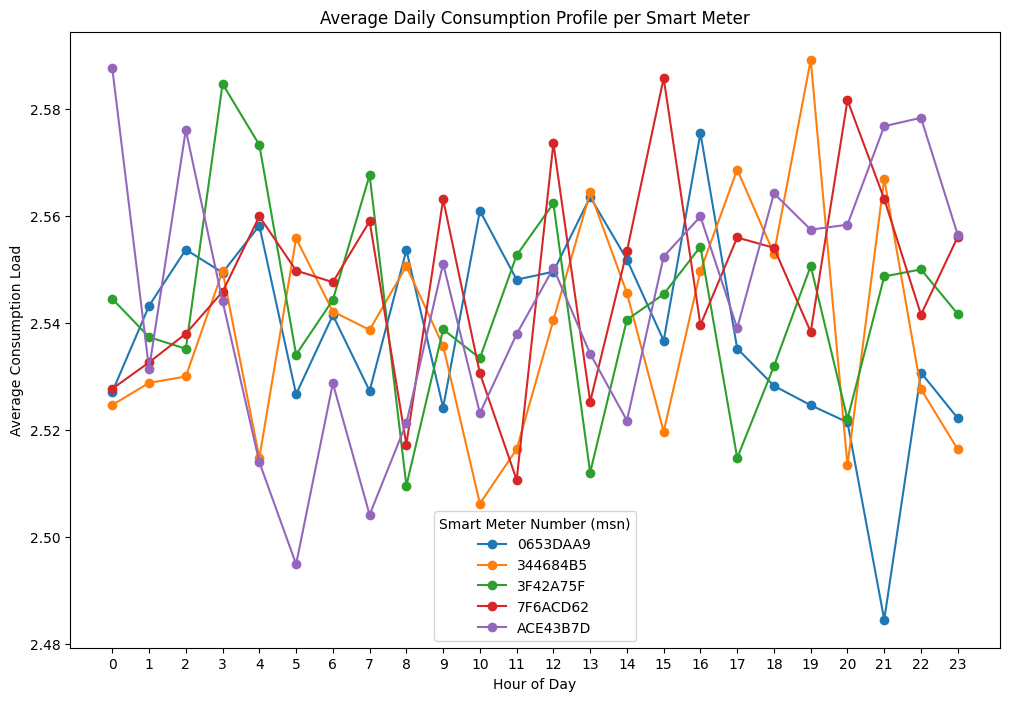

In [36]:
# Calculate the daily profile for each smart meter
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
daily_profile = df.groupby(['msn', 'hour'])['daily_consumption_load'].mean().reset_index()
plt.figure(figsize=(12,8))
for msn in daily_profile['msn'].unique():
    meter_data = daily_profile[daily_profile['msn'] == msn]
    plt.plot(meter_data['hour'], meter_data['daily_consumption_load'], marker='o', label=msn)
plt.xlabel('Hour of Day')
plt.ylabel('Average Consumption Load')
plt.title('Average Daily Consumption Profile per Smart Meter')
plt.legend(title='Smart Meter Number (msn)')
plt.xticks(range(0,24))
plt.show()
